<a href="https://colab.research.google.com/github/avani1998/ECE-6123-Image-and-Video-Processing/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


# Problem 1a
Load an RGB color image and display the RGB image as well as the R, G, and B
channels separately. Describe what you observe in each component.

(3744, 5616, 3)


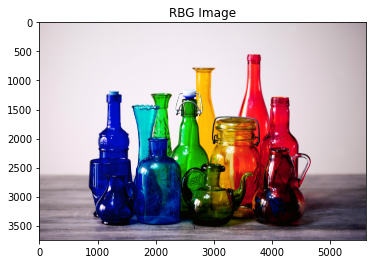

In [ ]:
## Read image from Google Drive.
img =cv2.imread("/content/drive/MyDrive/IVP_Assignments/rgb_image.jpeg")

print(img.shape)
plt.title("RBG Image")
plt.imshow(img) 

Shape of the image is (3744, 5616, 3) representing the height, width and the three channels of the image (R, G, B)



> ### Greyscale Image

(3744, 5616)


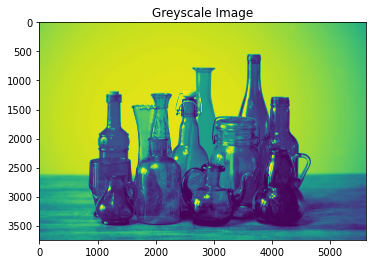

In [ ]:
## Read image from Google Drive.
img_grey = cv2.imread("/content/drive/MyDrive/IVP_Assignments/rgb_image.jpeg",0) # flag value 0 indicates that the image is to be read as a greyscale image

print(img_grey.shape)
plt.title("Greyscale Image")
plt.imshow(img_grey)

### Displaying R, G and B channels seperately:

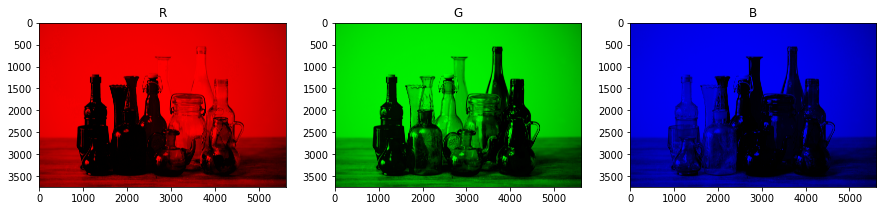

In [ ]:
red_img = np.zeros(img.shape,dtype="uint8")
green_img = np.zeros(img.shape,dtype="uint8")
blue_img = np.zeros(img.shape,dtype="uint8")
red_img[:,:,0] = img[:,:,0]
green_img[:,:,1] = img [:,:,1]
blue_img[:,:,2] = img [:,:,2]

plt.figure(figsize = (15,15))

plt.subplot(1,3,1)
plt.title("R")
plt.imshow(red_img)

plt.subplot(1,3,2)
plt.title("G")
plt.imshow(green_img)

plt.subplot(1,3,3)
plt.title("B")
plt.imshow(blue_img)

We see that despite not being perceivably red, blue or green to the human eye, these colours are present in most if the components of the image. The background, for instance has all, red, blue and green colors. 

We also observe that if a component of the image does not have a channel, it is shown as black. For exxample, in the blue image, bottels to the right side do not have a blue channel and are therefore displayed in black. 

# Problem 1b 
Convert the RGB image to the HSV colorspace and display the H, S, and V channels separately. Describe your observations.

(3744, 5616, 3)


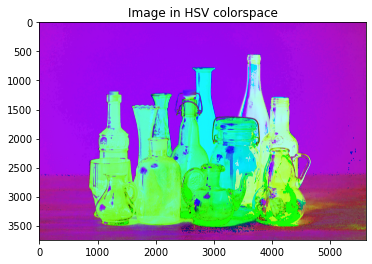

In [ ]:
hsv_image = cv2.cvtColor(img,cv2.COLOR_RGB2HSV) # convert to HSV colorspace 
print(hsv_image.shape)                          # HSV image also has third dimension 
plt.title("Image in HSV colorspace")
plt.imshow(hsv_image,cmap = 'hsv')

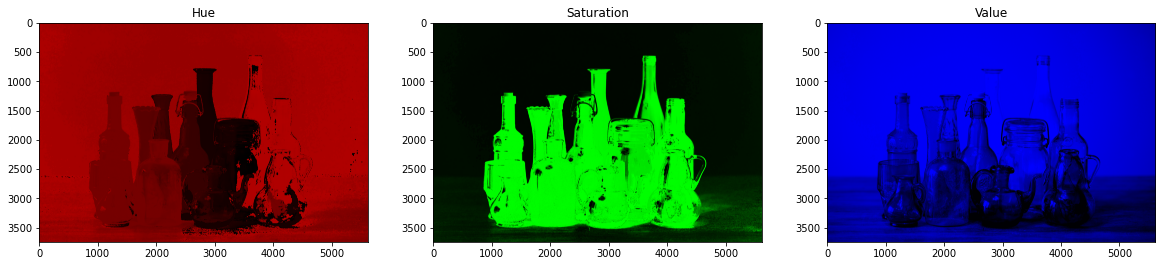

In [ ]:
hue_img = np.zeros(hsv_image.shape,dtype="uint8")
hue_img [:,:,0] = hsv_image[:,:,0]

saturation_img = np.zeros(hsv_image.shape,dtype="uint8")
saturation_img [:,:,1] = hsv_image[:,:,1]

value_img = np.zeros(hsv_image.shape,dtype="uint8")
value_img [:,:,2] = hsv_image[:,:,2]

plt.figure(figsize = (20,20))


plt.subplot(1,3,1)
plt.title("Hue")
plt.imshow(hue_img,cmap = 'hsv')

plt.subplot(1,3,2)
plt.title("Saturation")
plt.imshow(saturation_img)

plt.subplot(1,3,3)
plt.title("Value")
plt.imshow(value_img)

Here we observe that HSV colorspace seperates the hue, saturation and value of the image. 

# Problem 1c
Detect blue pixels, de ned by having a hue in range [110, 130]. Your detected pixels should be in the form of a binary mask. Use this mask to display only the blue pixels of your original image, with the non-blue pixels displayed as black.

In [ ]:
min_hue = (110,0,0)           # all blue pixels with hue in range (110,130) and having any saturation and intensity values
max_hue=(130,255,255)
mask = cv2.inRange(hsv_image,min_hue,max_hue) #create mask of only blue pixels
result = cv2.bitwise_and(img, img, mask=mask) # original image AND mask = only blue pixels

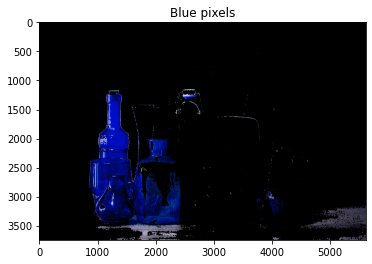

In [ ]:
plt.title("Blue pixels")
plt.imshow(result)

# Problem 2a
Load and display a low-contrast grayscale image.

(200, 300)


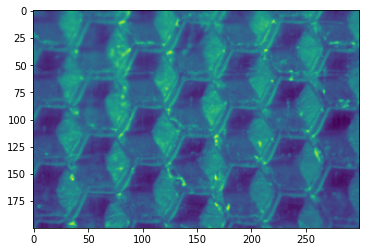

In [ ]:
greyscale_lowContrast = cv2.imread("/content/drive/MyDrive/IVP_Assignments/greyscale_lowContrast.png", cv2.IMREAD_GRAYSCALE) # read image and tell 
#python image is a greyscale image so that shape does not have an RGB channel
print(greyscale_lowContrast.shape)      # shape of greyscale image
plt.imshow(greyscale_lowContrast)

# Problem 2b
Calculate and plot the image's histogram. Comment on the relation between the
image's contrast and its histogram.

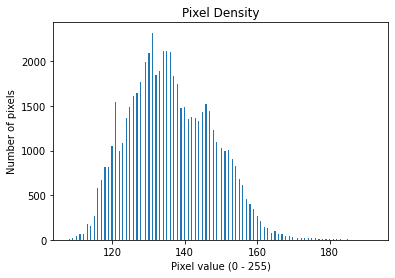

In [ ]:
histogram= plt.hist(greyscale_lowContrast.flatten(), bins = 256)[0]   # plt.hist returns array of value of histogram bins
plt.xlabel("Pixel value (0 - 255)")
plt.ylabel("Number of pixels")
plt.title("Pixel Density")
plt.show()                        #display histogram of image

The image histogram represnets the number of pixels in the image having a particular value. For a greyscale image there are 256 intensities therefore the graph displays pixel value along the x-axis and number of pixels along the y-axis. 

We observe that the histogram takes and almost normal form which shows that image values are concentrated near a narrow region. **This implies that the image is a low contrast image**. 

In [ ]:
print(histogram[0:15]) # first 16 values of the plt.hist output

[ 8.  0.  0. 23.  0.  0. 42.  0.  0. 61.  0.  0. 65.  0.  0.]


#Problem 2c
Recall, we derived in lecture that the cumulative distribution function (CDF) of the histogram is the theoretic optimal histogram-equalization transformation function. Plot the CDF of your histogram. Is this an appropriate equalization function? Why or why not?

In [ ]:
# compute CDF (cumulative distrubution function )

CDF = np.zeros(256)         # initialize CDF as numpy array of length 256
for i in range(0,256):
   CDF[i]=np.uint8(sum(histogram[0:i])*255)     #find cumulative value till ith index, multiply with 255 and scale down to 
                                                # integer values between 0 and 255

In [ ]:
print(CDF[0:15])      # first 16 values of CDF, all in range 0-255

[  0. 248. 248. 248. 225. 225. 225. 183. 183. 183. 122. 122. 122.  57.
  57.]


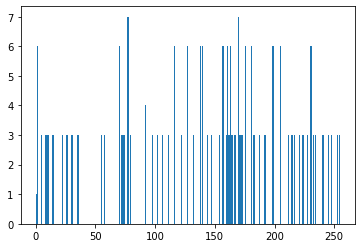

In [ ]:
plt.hist(CDF, bins = 256)           #plotting CDF of histogram
plt.show()

We see that using CDF we do not get a perfectly flat graph (which is desireable.) CDF is not the best histogram equalization function because it is not able to enhance contrast of local details. An image can have a good global contrast and may require only enhnacement in some areas locally. CDF works by increasing the contrast globally. 

#Problem 2d
Apply the CDF as a transformation function to your image1. Display your trans-
formed image and its histogram. Has your image's histogram been equalized? Comment on the your original image and histogram vs. the transformed image and
histogram.

In [ ]:
print(greyscale_lowContrast.shape)

(200, 300)


In [ ]:
#shape [width][height]
#        columns x rows
# hist_img=np.zeros((200,300))
# for i in range (0,greyscale_lowContrast.shape[1]):
#   for j in range (0,greyscale_lowContrast.shape[0]):
#     f = greyscale_lowContrast[j][i]+1
#     hist_img[j][i]= CDF[f]

In [ ]:
hist_img=np.zeros((greyscale_lowContrast.shape[0],greyscale_lowContrast.shape[1]))
for j in range (0,greyscale_lowContrast.shape[0]):
  for i in range (0,greyscale_lowContrast.shape[1]):
    f = greyscale_lowContrast[j][i]+1
    hist_img[j][i]= CDF[f]

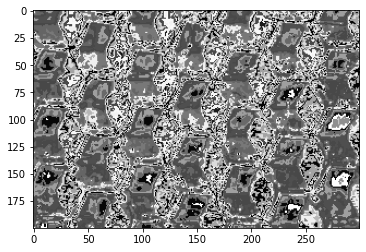

In [ ]:
plt.imshow(hist_img, 'gray')

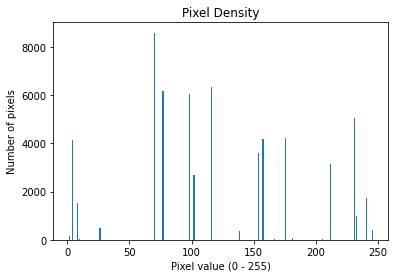

In [ ]:
histogram= plt.hist(hist_img.flatten(), bins = 256)[0]   # plt.hist returns array of value of histogram bins
plt.xlabel("Pixel value (0 - 255)")
plt.ylabel("Number of pixels")
plt.title("Pixel Density")
plt.show()  

The above obtained image shows the effect of using CDF as the histogram equalization function. 

We observe that the contrast of image has been enhanced grately in comparision to the original image. The original image histogram was bell shaped curve and the CDF of the histogram is almost flat with some high values. 